## Support vector machines

This notebook contains:
- Code for training SVM models to classify texts as being either LLM-generated or human-written.
- Code for calculating and visualizing SHAP values (feature importance) of the best performing model

In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import shap
from scipy.sparse import load_npz
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
import pickle
from sklearn.model_selection import train_test_split


In [2]:
train_data_x_sparse = load_npz('../data/train_data_x_sparse.npz')
train_data_x_dense = pd.read_csv('../data/train_data_x_dense.csv')
pretest_data_x_sparse = load_npz('../data/pretest_data_x_sparse.npz')
pretest_data_x_dense = pd.read_csv('../data/pretest_data_x_dense.csv')
test_data_x_sparse = load_npz('../data/test_data_x_sparse.npz')
test_data_x_dense = pd.read_csv('../data/test_data_x_dense.csv')

train_data_x = pd.DataFrame(hstack([train_data_x_sparse, csr_matrix(train_data_x_dense.values)]).toarray())
pretest_data_x = pd.DataFrame(hstack([pretest_data_x_sparse, csr_matrix(pretest_data_x_dense.values)]).toarray())
test_data_x = pd.DataFrame(hstack([test_data_x_sparse, csr_matrix(test_data_x_dense.values)]).toarray())
train_data_y = np.ravel(pd.read_csv('../data/train_data_y.csv'))
pretest_data_y = np.ravel(pd.read_csv('../data/pretest_data_y.csv'))
test_data_y = np.ravel(pd.read_csv('../data/test_data_y.csv'))

# 10k samples for training and testing the non-fast SVM's
sampled_train_data_x, _, sampled_train_data_y, _ = train_test_split(train_data_x, train_data_y, train_size=10000, stratify=train_data_y, random_state=28)
sampled_pretest_data_x, _, sampled_pretest_data_y, _ = train_test_split(pretest_data_x, pretest_data_y, train_size=10000, stratify=pretest_data_y, random_state=28)
sampled_test_data_x, _, sampled_test_data_y, _ = train_test_split(test_data_x, test_data_y, train_size=10000, stratify=test_data_y, random_state=28)

with open('../data/sparse_matrices_feature_names.pkl', 'rb') as f:
    sparse_matrices_feature_names = pickle.load(f)

all_feature_names = list(sparse_matrices_feature_names) + list(train_data_x_dense.columns)
dense_feature_indices = [all_feature_names.index(feature) for feature in train_data_x_dense.columns]
dense_feature_names = list(train_data_x_dense.columns) # Engineered features
sparse_feature_indices = [all_feature_names.index(feature) for feature in sparse_matrices_feature_names]
sparse_feature_names = list(sparse_matrices_feature_names) # TF-IDF features

In [3]:
# Faster linear SVM, works with a lot of data

fast_linear_svm_classifier = LinearSVC(dual="auto", random_state=28)

fast_linear_svm_classifier.fit(train_data_x, train_data_y)



LinearSVC(dual='auto', random_state=28)

In [4]:
# Training a Linear SVM model, using sampled data

linear_svm_classifier = SVC(kernel='linear', random_state=28)

linear_svm_classifier.fit(sampled_train_data_x, sampled_train_data_y)

SVC(kernel='linear', random_state=28)

In [5]:
# Training a Polynimial SVM model, using sampled data

polynomial_svm_classifier = SVC(kernel='poly', degree=3, random_state=28)

polynomial_svm_classifier.fit(sampled_train_data_x, sampled_train_data_y)


SVC(kernel='poly', random_state=28)

In [6]:
# Training a Radial Basis Function SVM model, using sampled data

rbf_svm_classifier = SVC(kernel='rbf', random_state=28)

rbf_svm_classifier.fit(sampled_train_data_x, sampled_train_data_y)


SVC(random_state=28)

In [7]:
# Training a Sigmoid SVM model, using sampled data

sigmoid_svm_classifier = SVC(kernel='sigmoid', random_state=28)

sigmoid_svm_classifier.fit(sampled_train_data_x, sampled_train_data_y)



SVC(kernel='sigmoid', random_state=28)

In [8]:
# GitHub Copilot used for code completion, to save time

fast_linear_svm_f1_train = f1_score(train_data_y, fast_linear_svm_classifier.predict(train_data_x))
linear_svm_f1_train = f1_score(sampled_train_data_y, linear_svm_classifier.predict(sampled_train_data_x))
polynomial_svm_f1_train = f1_score(sampled_train_data_y, polynomial_svm_classifier.predict(sampled_train_data_x))
rbf_svm_f1_train = f1_score(sampled_train_data_y, rbf_svm_classifier.predict(sampled_train_data_x))
sigmoid_svm_f1_train = f1_score(sampled_train_data_y, sigmoid_svm_classifier.predict(sampled_train_data_x))

fast_linear_svm_f1_pretest = f1_score(pretest_data_y, fast_linear_svm_classifier.predict(pretest_data_x))
linear_svm_f1_pretest = f1_score(sampled_pretest_data_y, linear_svm_classifier.predict(sampled_pretest_data_x))
polynomial_svm_f1_pretest = f1_score(sampled_pretest_data_y, polynomial_svm_classifier.predict(sampled_pretest_data_x))
rbf_svm_f1_pretest = f1_score(sampled_pretest_data_y, rbf_svm_classifier.predict(sampled_pretest_data_x))
sigmoid_svm_f1_pretest = f1_score(sampled_pretest_data_y, sigmoid_svm_classifier.predict(sampled_pretest_data_x))

fast_linear_svm_f1_test = f1_score(test_data_y, fast_linear_svm_classifier.predict(test_data_x))
linear_svm_f1_test = f1_score(sampled_test_data_y, linear_svm_classifier.predict(sampled_test_data_x))
polynomial_svm_f1_test = f1_score(sampled_test_data_y, polynomial_svm_classifier.predict(sampled_test_data_x))
rbf_svm_f1_test = f1_score(sampled_test_data_y, rbf_svm_classifier.predict(sampled_test_data_x))
sigmoid_svm_f1_test = f1_score(sampled_test_data_y, sigmoid_svm_classifier.predict(sampled_test_data_x))

# GitHub Copilot used for print statement formatting
print(f"{'':<20s}{'|':<12s}{'Fast linear SVM':<23s}{'|':<12s}{'Linear SVM':<23s}{'|':<8s}{'Polynomial SVM':<27s}{''}{'|':<12s}{'RBF SVM':<23s}{'|':<12s}{'Sigmoid SVM':<23s}{'|'}")
print(f"{'-' * 20}{'|'}{'-' * 17}{'+'}{'-' * 16}{'+'}{'-' * 17}{'+'}{'-' * 16}{'+'}{'-' * 17}{'+'}{'-' * 16}{'+'}{'-' * 17}{'+'}{'-' * 16}{'+'}{'-' * 17}{'+'}{'-' * 16}{'|'}")
print(f"{'F1 score train':<20s}{'|':<15s}{fast_linear_svm_f1_train:<20.4f}{'|':<15s}{linear_svm_f1_train:<20.4f}{'|':<15s}{polynomial_svm_f1_train:<20.4f}{'|':<15s}{rbf_svm_f1_train:<20.4f}{'|':<15s}{sigmoid_svm_f1_train:<20.4f}{'|'}")
print(f"{'F1 score pretest':<20s}{'|':<15s}{fast_linear_svm_f1_pretest:<20.4f}{'|':<15s}{linear_svm_f1_pretest:<20.4f}{'|':<15s}{polynomial_svm_f1_pretest:<20.4f}{'|':<15s}{rbf_svm_f1_pretest:<20.4f}{'|':<15s}{sigmoid_svm_f1_pretest:<20.4f}{'|'}")
print(f"{'F1 score test':<20s}{'|':<15s}{fast_linear_svm_f1_test:<20.4f}{'|':<15s}{linear_svm_f1_test:<20.4f}{'|':<15s}{polynomial_svm_f1_test:<20.4f}{'|':<15s}{rbf_svm_f1_test:<20.4f}{''}{'|':<15s}{sigmoid_svm_f1_test:<20.4f}{'|'}")

                    |           Fast linear SVM        |           Linear SVM             |       Polynomial SVM             |           RBF SVM                |           Sigmoid SVM            |
--------------------|-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+----------------+-----------------+----------------|
F1 score train      |              0.9123              |              0.9098              |              0.8897              |              0.8766              |              0.8668              |
F1 score pretest    |              0.9021              |              0.8820              |              0.8750              |              0.8728              |              0.8664              |
F1 score test       |              0.8808              |              0.8172              |              0.7937              |              0.7883              |              0.7934              |


In [9]:
# Samples used for calculating SHAP values

shap_samples = shap.sample(test_data_x, 100, random_state=28)
dense_shap_samples = shap_samples.iloc[:, dense_feature_indices]
sparse_shap_samples = shap_samples.iloc[:, sparse_feature_indices]

In [10]:
# SHAP explenations for the best performing model - Fast linear SVM

explainer = shap.KernelExplainer(fast_linear_svm_classifier.predict, shap_samples)

shap_values = explainer.shap_values(shap_samples, num_workers=8)
dense_shap_values = shap_values[:, dense_feature_indices]
sparse_shap_values = shap_values[:, sparse_feature_indices]

  0%|          | 0/100 [00:00<?, ?it/s]

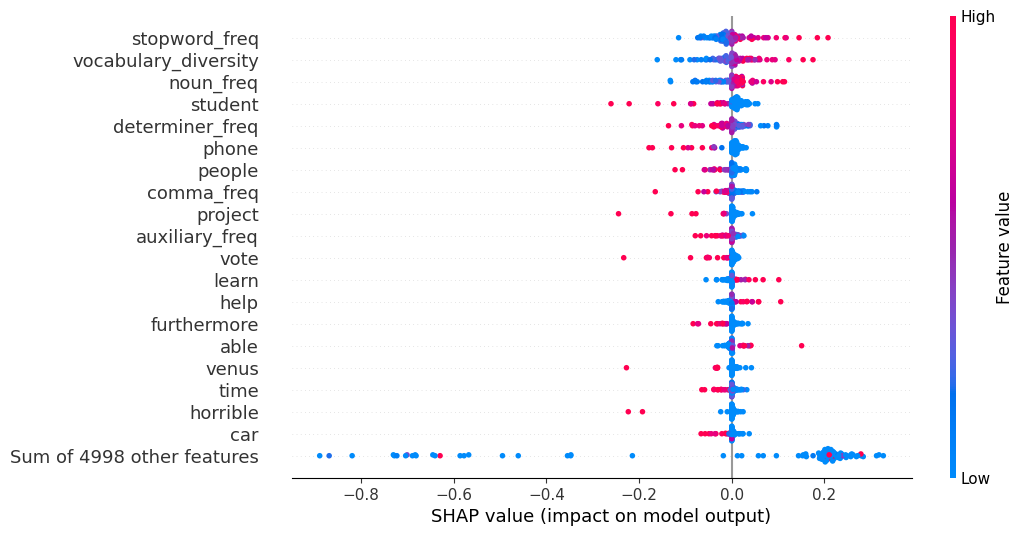

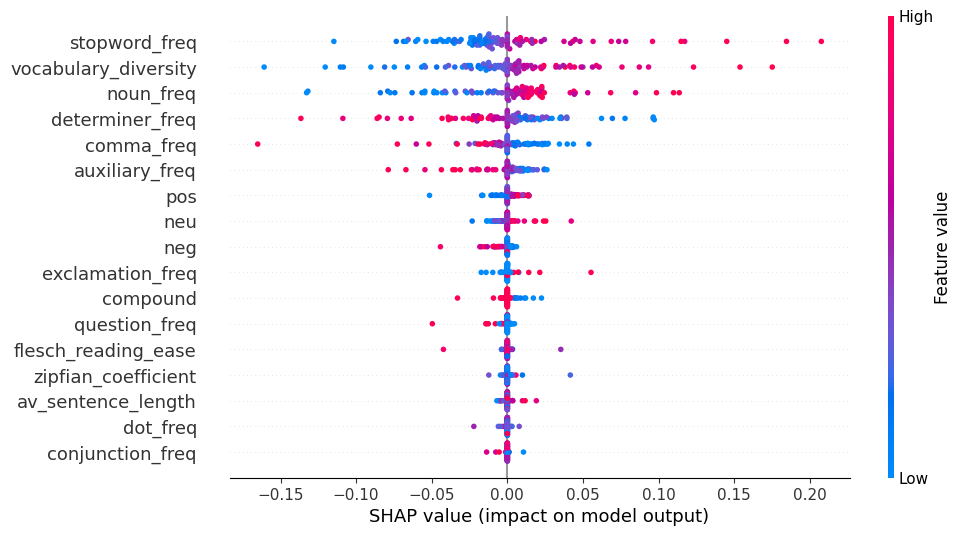

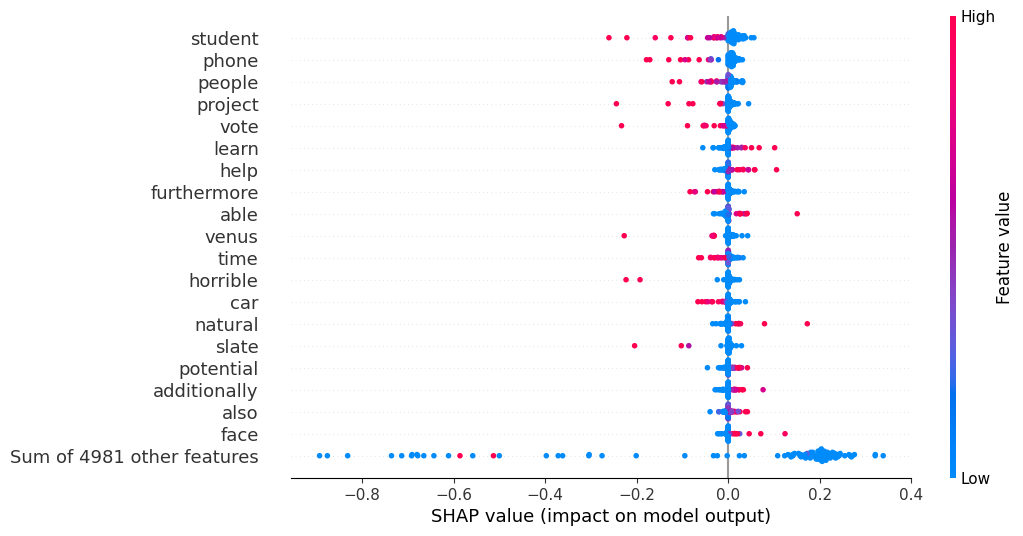

In [12]:
# Visualizing feature importance through beeswarm plots

shap.plots.beeswarm(
    shap.Explanation(values=shap_values, data=shap_samples, feature_names=all_feature_names),
    max_display=20,
    plot_size=(10, 6)
)

shap.plots.beeswarm(
    shap.Explanation(values=dense_shap_values, data=dense_shap_samples, feature_names=dense_feature_names),
    max_display=20,
    plot_size=(10, 6)
)

shap.plots.beeswarm(
    shap.Explanation(values=sparse_shap_values, data=sparse_shap_samples, feature_names=sparse_feature_names),
    max_display=20,
    plot_size=(10, 6)
)